In [ ]:
# GPU setup
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
processor = DonutProcessor.from_pretrained(r'E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-800')

In [ ]:
# model = VisionEncoderDecoderModel.from_pretrained(r'naver-clova-ix/donut-base')
# model.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\model_save_dirctory\LieghtModel",)

In [ ]:
# model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-2200")
# model.to(device)


model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-2200")
model.to(device)



Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    720,
    960
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.46.1",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add_f

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
model.num_parameters()

201868408

# Dataset

In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\generated_dataset\processed_dataset")

dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 839
    })
    valid: Dataset({
        features: ['image', 'text'],
        num_rows: 239
    })
})

In [ ]:
# import os
# import json

# def fill_missing_keys(json_file_path):
#     # Open and read the JSON file
#     with open(json_file_path, 'r') as f:
#         data = json.load(f)

#     # Define the expected keys
#     expected_keys = [f'latex_{i}' for i in range(10)]

#     # Check for missing keys and fill them with 'None' if necessary
#     for key in expected_keys:
#         if key not in data:
#             data[key] = 'None'  # Add the key with the value 'None'

#     # Save the updated data back to the JSON file
#     with open(json_file_path, 'w') as f:
#         json.dump(data, f, indent=4)

# def process_json_files_in_folder(folder_path):
#     # Iterate over all files in the specified folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.json'):
#             json_file_path = os.path.join(folder_path, filename)
#             fill_missing_keys(json_file_path)
#             print(f'Filled missing keys in {filename}')

# # Specify the folder containing the JSON files
# folder_A =r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\train/A"  # Replace with the actual path to folder A

# # Process the JSON files
# process_json_files_in_folder(folder_A)


In [ ]:
# import os
# import json
# import pandas as pd
# from PIL import Image
# from datasets import Dataset, DatasetDict

# # Specify the path to your validation image folder and JSON files folder
# image_folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\valid/images"
# json_folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\valid/A"

# # List all image file paths and corresponding JSON files in the folders
# image_files = [os.path.join(image_folder_path, image_file) for image_file in os.listdir(image_folder_path) if image_file.endswith('.jpg')]
# json_files = [os.path.join(json_folder_path, json_file) for json_file in os.listdir(json_folder_path) if json_file.endswith('.json')]

# # Initialize lists to store image paths and corresponding ground truth
# valid_images = []
# valid_gt = []

# # Read each JSON file and extract information in the new format
# for image_file in image_files:
#     json_file = os.path.join(json_folder_path, os.path.splitext(os.path.basename(image_file))[0] + '.json')
#     if os.path.exists(json_file):
#         with open(json_file, 'r') as f:
#             data = json.load(f)

#             # Convert JSON directly to the expected format
#             latex_dict = {key: value for key, value in data.items() if key.startswith("latex_")}

#             # Append the modified dictionary to valid_gt
#             valid_images.append(Image.open(image_file))
#             valid_gt.append(latex_dict)

# # Create a dictionary with keys 'image' and 'text' for the validation split
# valid_data = {'image': valid_images, 'text': valid_gt}

# import os
# import json
# from PIL import Image

# # Specify the path to your training image and JSON folders
# image_folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\train/images"
# json_folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\train/A"

# # List all image file paths and corresponding JSON files in the folders
# image_files = [os.path.join(image_folder_path, image_file) for image_file in os.listdir(image_folder_path) if image_file.endswith('.jpg')]
# json_files = [os.path.join(json_folder_path, json_file) for json_file in os.listdir(json_folder_path) if json_file.endswith('.json')]

# # Initialize lists to store image paths and corresponding ground truth
# train_images = []
# train_gt = []

# # Read each JSON file and extract information in the required format
# for image_file in image_files:
#     json_file = os.path.join(json_folder_path, os.path.splitext(os.path.basename(image_file))[0] + '.json')
#     if os.path.exists(json_file):
#         with open(json_file, 'r') as f:
#             data = json.load(f)
#             print(data)

#             data = {**data}

#             # Convert JSON directly to the expected format
#             latex_dict = {key: value for key, value in data.items() if key.startswith("latex_") and value is not None}

#             print(latex_dict)

#             # Append the modified dictionary to train_gt
#             train_images.append(Image.open(image_file))
#             train_gt.append(latex_dict)

# # Create a dictionary with keys 'image' and 'text' for the training split{'latex_1': 'D : S \\rightarrow S + \\lambda ,', 'latex_2': '\\hat { \\nabla } _ { m } \\tilde { \\eta } = 0 .', 'latex_3': 'E = e \\lparen 1 + 4 \\theta _ { 1 } e \\rparen ,', 'latex_4': 'z = \\cos ^ { 2 } \\frac { \\mu } { 2 R } .', 'latex_5': '\\bar { \\Delta } U = 0 = \\bar { U } \\Delta ,', 'latex_6': '\\ln \\omega _ { \\alpha } = \\ln \\omega _ { \\beta } .', 'latex_7': '\\delta _ { \\omega } I \\lbrack \\theta \\rbrack = 0 ,', 'latex_8': 'v \\lambda + x y = 0 , v + x u \\rho ^ { 2 } = 0 .'}

# train_data = {'image': train_images, 'text': train_gt}

# # Create datasets from the formatted dictionaries
# Trdataset = Dataset.from_dict(train_data)
# Vedataset = Dataset.from_dict(valid_data)







# # Combine into a DatasetDict
# data_dict = DatasetDict({
#     'train': Trdataset,
#     'valid': Vedataset
# })



In [ ]:
#data_dict.save_to_disk(r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex4\Processed_Dataset")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 839
    })
    valid: Dataset({
        features: ['image', 'text'],
        num_rows: 239
    })
})

Random sample from 'train' is 657
Ground Truth is {'latex_1': '\\tilde { \\Psi } = \\lparen \\cosh V \\rparen \\Psi ,', 'latex_2': '\\vert \\psi \\vert ^ { 2 } = \\rho =', 'latex_3': '\\partial _ { k } T ^ { i k } = O _ { 3 , 3 }', 'latex_4': '\\tau _ { s } \\approx 1 0 . 1 5', 'latex_5': 'v \\mapsto v \\otimes L', 'latex_6': 'd ^ { D } r = r ^ { D - 1 } d \\Omega _ { D } d r .', 'latex_7': '\\hat { t } = - \\frac { 1 } { \\kappa } \\hat { r } .', 'latex_8': 'k _ { 1 } = - q , k _ { 2 } = 3 q - p .'}


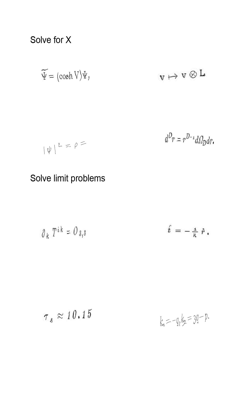

In [ ]:
import random
random_sample_train = random.randint(0, len(dataset['train']) - 1)
print(f"Random sample from 'train' is {random_sample_train}")
print(f"Ground Truth is {dataset['train'][random_sample_train]['text']}")
dataset['train'][random_sample_train]['image'].resize((250, 400))

In [ ]:
def json2token(data):
    # Initialize an empty string to build the formatted output
    formatted_output = ''

    # Loop through each key-value pair in the dictionary
    for key, value in data.items():
        # Remove commas and format each pair without single quotes
        #value = str(value).replace(',', '')  # Remove commas
        value = str(value).replace('.', '')
        formatted_output += f"<s_{key}>{value}</s_{key}>"

    # Return the final formatted output string
    return formatted_output.strip()  # Remove trailing whitespace


# # Example dictionary input
# A = {
#     'latex1': '\\lbrace \\dot { X } ^ { \\mu } , X _ { \\mu } \\rbrace = 0 .',
#     'latex2': 'J ^ { \\mu \\nu } = L ^ { \\mu \\nu } + S ^ { \\mu \\nu } ,',
#     'latex3': 'e ^ { - C } = H _ { 1 } , e ^ { - \\chi } = H _ { 2 } .',
#     'latex4': 'N _ { \\mu \\nu } \\equiv G _ { \\mu \\nu } - B _ { \\mu \\nu } ,',
#     'latex5': 'I ^ { \\omega } = \\bigcup I ^ { \\omega } \\lparen O \\rparen .',
#     'latex6': '\\partial _ { \\mu } h _ { \\nu } + \\partial _ { \\nu }',
#     'latex7': '\\mu _ { p } = N \\sqrt { 1 6 \\pi G _ { D } } \\tau _ { p } .',
#     'latex8': '\\nu = l \\sinh \\rho , \\sigma = l \\cosh \\rho .'
# }

# # Convert the dictionary to the desired format
# output = json2token(A)
# print(output)


In [ ]:

special_tokens = ['<s_latex0>', '</s_latex0>', '<s_latex1>', '</s_latex1>', '<s_latex2>', '</s_latex2>', '<s_latex3>', '</s_latex3>', '<s_latex4>', '</s_latex4>', '<s_latex5>', '</s_latex5>', '<s_latex6>', '</s_latex6>', '<s_latex7>', '</s_latex7>', '<s_latex8>', '</s_latex8>', '<s_latex9>', '</s_latex9>' ]

In [ ]:
import json

task_start_token = '<s>'
eos_token = '</s>'

def process_documents(sample):

  GT_string_single_quote = sample["text"]
  GT_string_single_quote = str(GT_string_single_quote)
  #print(type(sample["text"]))

  GT_string_double_quote = GT_string_single_quote.replace("'", '"')
  text = json.loads(GT_string_double_quote)
  d_doc = task_start_token + json2token(text) + eos_token
  print('d_doc', d_doc)
  image = sample["image"].convert('RGB')
  return {"image": image, "text": d_doc}

In [ ]:
valid_dataset = dataset['valid']
proc_valid_dataset = valid_dataset.map(process_documents)

In [ ]:
train_dataset = dataset['train']
proc_train_dataset = train_dataset.map(process_documents)

In [ ]:
len(proc_train_dataset), len(proc_valid_dataset)

(839, 239)

In [ ]:
proc_train_dataset['text'][322]

'<s><s_latex_1> c _ { l } \\vert _ { y = 0 } = 0 ,</s_latex_1><s_latex_2>\\lbrack R \\rbrack ^ { \\sharp } = 0 </s_latex_2><s_latex_3>Q = \\dot { x } _ { i } \\psi _ { i } </s_latex_3><s_latex_4>l _ { q } d K = q ^ { - 2 } d K l _ { q } </s_latex_4><s_latex_5>A =</s_latex_5><s_latex_6>V = V _ { + } \\oplus V _ { - } ,</s_latex_6><s_latex_7>B = - \\frac { \\alpha } { 2 n \\nu } </s_latex_7><s_latex_8>\\lim_{x \\to 1} \\frac{x^3 - 1}{x - 1} </s_latex_8></s>'

In [ ]:
proc_valid_dataset['text'][64]

'<s><s_latex_1>\\gamma = - 1 , \\beta = \\frac { 2 \\pi } { k } ,</s_latex_1><s_latex_2>c _ { 0 } ^ { 2 } + \\vec { c } ^ { 2 } = 1</s_latex_2><s_latex_3>W _ { \\mu } S = 0 ,</s_latex_3><s_latex_4>\\tilde { A } _ { \\mu } = A _ { \\mu } </s_latex_4><s_latex_5>A U - i B V = U E ,</s_latex_5><s_latex_6>\\equiv h _ { i } \\delta _ { i j }</s_latex_6><s_latex_7>\\tilde { v } \\ll \\epsilon \\lt \\frac { 1 } { a } ,</s_latex_7><s_latex_8>V _ { I } q ^ { I } = \\frac { 1 } { 3 g } </s_latex_8></s>'

# processor and model token setup

In [ ]:
from transformers import VisionEncoderDecoderConfig

image_size = [720, 960]
max_length = 512

# update image_size of the encoder
# during pre-training, a larger image size was used
config = model.config
#config = VisionEncoderDecoderConfig.from_pretrained(r"E:\Abdul_Muqtadir\NRPU_HMP_Project\Weights\DONUT\Processor1")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length

In [ ]:
processor.tokenizer.add_special_tokens({"additional_special_tokens": special_tokens + [task_start_token] + [eos_token]})

20

In [ ]:
model.decoder.resize_token_embeddings(len(processor.tokenizer))

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


MBartScaledWordEmbedding(57545, 1024, padding_idx=1)

In [ ]:
# Print standard special tokens
print("Special Tokens:")
print("Start token:", processor.tokenizer.cls_token)
print("End token:", processor.tokenizer.sep_token)
print("Padding token:", processor.tokenizer.pad_token)
print("Unknown token:", processor.tokenizer.unk_token)
print("Mask token:", processor.tokenizer.mask_token)

# Print any additional tokens that have been added, like custom tags
print("\nAdditional Special Tokens:")
for token, idx in processor.tokenizer.get_vocab().items():
    if token.startswith("<s") or token.startswith("</s"):
        print(f"{token}: {idx}")


Special Tokens:
Start token: <s>
End token: </s>
Padding token: <pad>
Unknown token: <unk>
Mask token: <mask>

Additional Special Tokens:
<sep/>: 57522
<s_latex0>: 57525
<s_latex5>: 57535
</s>: 2
</s_latex0>: 57526
</s_latex2>: 57530
<s_latex1>: 57527
<s_latex7>: 57539
<s_synthdog>: 57524
<s_iitcdip>: 57523
</s_latex4>: 57534
</s_latex1>: 57528
<s_latex4>: 57533
<s_latex3>: 57531
</s_latex6>: 57538
</s_latex3>: 57532
</s_latex8>: 57542
<s_latex6>: 57537
</s_latex5>: 57536
</s_latex9>: 57544
<s_latex8>: 57541
</s_latex7>: 57540
<s>: 0
<s_latex9>: 57543
<s_latex2>: 57529


In [ ]:
config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s>'])[0]

In [ ]:
# Set tokens in the model's configuration
model.config.bos_token_id = processor.tokenizer.cls_token_id  # Start token
model.config.eos_token_id = processor.tokenizer.sep_token_id  # End token
model.config.pad_token_id = processor.tokenizer.pad_token_id  # Padding token

print("Start token ID:", model.config.bos_token_id)
print("End token ID:", model.config.eos_token_id)
print("Padding token ID:", model.config.pad_token_id)


Start token ID: 0
End token ID: 2
Padding token ID: 1


In [ ]:
# Checking the added special tokens
added_special_tokens_for_processor_1 = processor.tokenizer.get_added_vocab()
print("Added special tokens and their IDs:", added_special_tokens_for_processor_1)
print("Number of added special tokens:", len(added_special_tokens_for_processor_1))

Added special tokens and their IDs: {'<s>': 0, '<pad>': 1, '</s>': 2, '<unk>': 3, '<mask>': 57521, '<sep/>': 57522, '<s_iitcdip>': 57523, '<s_synthdog>': 57524, '<s_latex0>': 57525, '</s_latex0>': 57526, '<s_latex1>': 57527, '</s_latex1>': 57528, '<s_latex2>': 57529, '</s_latex2>': 57530, '<s_latex3>': 57531, '</s_latex3>': 57532, '<s_latex4>': 57533, '</s_latex4>': 57534, '<s_latex5>': 57535, '</s_latex5>': 57536, '<s_latex6>': 57537, '</s_latex6>': 57538, '<s_latex7>': 57539, '</s_latex7>': 57540, '<s_latex8>': 57541, '</s_latex8>': 57542, '<s_latex9>': 57543, '</s_latex9>': 57544}
Number of added special tokens: 28


In [ ]:
def transform_and_tokenize(sample, max_length=512, ignore_id=1):
    # Create tensor from image
    try:
        pixel_values = processor(
            sample["image"], return_tensors="pt"
        ).pixel_values.squeeze()
    except Exception as e:
        print(f"Error processing image: {e}")
        return {}

    # Tokenize the document
    input_ids = processor.tokenizer(
        sample["text"],
        add_special_tokens=True,  # Add special tokens like [CLS] and [SEP]
        max_length=max_length,
        padding="max_length",  # Pad to max_length
        truncation=True,  # Truncate if longer than max_length
        return_tensors="pt",
    )["input_ids"].squeeze(0)

    # Prepare labels for the model
    labels = input_ids.clone()
    labels[labels == processor.tokenizer.pad_token_id] = ignore_id  # Ignore padding tokens

    return {
        "pixel_values": pixel_values,
        "labels": labels,
        "target_sequence": sample["text"]  # Include the original text if needed
    }


In [ ]:
processed_valid_dataset = proc_valid_dataset.map(
    transform_and_tokenize,
    batched=True,
    batch_size=100,
    remove_columns=["image", "text"]
)

Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [ ]:
# Assuming proc_train_dataset is your loaded dataset and transform_and_tokenize is the function to process each sample
proc_train_dataset = proc_train_dataset.map(
    transform_and_tokenize,
    batched=True,
    batch_size=100,
    remove_columns=["image", "text"]
)


Map:   0%|          | 0/839 [00:00<?, ? examples/s]

In [ ]:
processed_train_dataset = proc_train_dataset

In [ ]:
# from datasets import concatenate_datasets

# # Combine the datasets
# combined_dataset = concatenate_datasets([small_processed_train_dataset1, small_processed_train_dataset2])

# # Display the combined dataset
# print(combined_dataset)


In [ ]:
# # Limit to the first 10 samples
# small_valid_dataset = proc_valid_dataset.select(range(100))

# # Apply the transformation only on these 10 samples
# small_processed_valid_dataset = small_valid_dataset.map(transform_and_tokenize, remove_columns=["image", "text"])


In [ ]:
# small_processed_valid_dataset

In [ ]:
# small_processed_valid_dataset['target_sequence'][0]

In [ ]:
processed_train_dataset['target_sequence'][0]

'<s><s_latex_1>2 r \\frac { \\partial _ { 0 } \\beta } { \\beta } = 0</s_latex_1><s_latex_2>j _ { + } = \\mu , \\bar { \\jmath } _ { - } = \\nu ,</s_latex_2><s_latex_3>\\log_{10}(3xy) </s_latex_3><s_latex_4>w _ { I } = P - \\rho ,</s_latex_4><s_latex_5>D _ { \\mu } = \\partial _ { \\mu } + i e A _ { \\mu }</s_latex_5><s_latex_6>\\lparen A _ { \\pm } + \\alpha C _ { \\pm } \\rparen</s_latex_6><s_latex_7>3x + 2y + z = 8 </s_latex_7><s_latex_8>\\lparen \\bar { S } , \\bar { S } \\rparen = 0 </s_latex_8></s>'

In [ ]:
# Decode the labels of the first sample in `small_processed_valid_dataset`
decoded_labels = processor.tokenizer.decode(processed_train_dataset['labels'][0], skip_special_tokens=False)
print(decoded_labels)


<s><s> <s_latex_<unk>>2 r \frac { \partial _ { 0 } \beta } { \beta } = 0</s_latex_<unk>><s_latex_2>j _ { + } = \mu , \bar { \jmath } _ { - } = \nu ,</s_latex_2><s_latex_3>\log_{10}(3xy) </s_latex_3><s_latex_4>w _ { I } = P - \rho ,</s_latex_4><s_latex_5>D _ { \mu } = \partial _ { \mu } + i e A _ { \mu }</s_latex_5><s_latex_6>\lparen A _ { \pm } + \alpha C _ { \pm } \rparen</s_latex_6><s_latex_7>3x + 2y + z = 8 </s_latex_7><s_latex_8>\lparen \bar { S } , \bar { S } \rparen = 0 </s_latex_8></s></s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

# Training

In [ ]:
# import wandb
# wandb.login(key='64b4c0e264e78227e0ef7ffd55e5236e5665e193')

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DataInsight GPU\.netrc
wandb: ERROR Unable to read C:\Users\DataInsight GPU\.netrc


True

In [ ]:
import wandb
wandb.finish()
from pytorch_lightning.loggers import WandbLogger

#wandb.init(project="Thesis", name="light_donut_MathOCR_Iam2Latex4")
wandb.init(project="Thesis", name="DONUT_to_Iamlatex2_B")
wandb_logger = WandbLogger()

wandb: Currently logged in as: studydrive-ee (abdul1). Use `wandb login --relogin` to force relogin


In [ ]:
from huggingface_hub import HfFolder
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# hyperparameters used for multiple args
OUTPUT_DIRECTORY = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\model_save_dirctory2"

# Arguments for training
training_args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIRECTORY,
    num_train_epochs=15,  # for EUGD = 2
    learning_rate=0.0001,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    lr_scheduler_type="cosine",
    warmup_steps=100,
    weight_decay=0.01,
    fp16=True,
    logging_steps=100,
    save_total_limit=15,
    evaluation_strategy="steps",
    eval_steps=200,  # Evaluate every 500 steps
    save_strategy="steps",
    save_steps=200,  # Save checkpoint every 500 steps
    # predict_with_generate=True,
    # push to hub parameters
    report_to="wandb",
    # push_to_hub=True,
    # hub_strategy="every_save",
    # hub_model_id=hf_repository_id,
    # hub_token=HfFolder.get_token(),
)




C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=processed_train_dataset,
    eval_dataset=processed_valid_dataset
)


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Step,Training Loss,Validation Loss
200,0.048000,0.037549
400,0.038100,0.031007
600,0.034800,0.026878
800,0.031100,0.017205
1000,0.023900,0.018736


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002313F6A40D0>>
Traceback (most recent call last):
  File "C:\Users\DataInsight GPU\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\envs\newdonut\Lib\threading.py", line 1501, in enumerate
    def enumerate():
    
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002313F6A40D0>>
Traceback (most recent call last):
  File "C:\Users\DataInsight GPU\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
         

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Step,Training Loss,Validation Loss
200,0.192000,0.175785
400,0.190900,0.173918
600,0.180500,0.169213
800,0.175000,0.167945
1000,0.167500,0.159763
1200,0.165100,0.152323
1400,0.153300,0.149445
1600,0.152000,0.152998
1800,0.149400,0.146569
2000,0.141100,0.142288


KeyboardInterrupt: 

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Step,Training Loss,Validation Loss
200,1.729200,1.016740
400,0.905900,0.831146
600,0.791800,0.738279
800,0.718100,0.682350
1000,0.671500,0.640404
1200,0.642200,0.605491
1400,0.601500,0.572437
1600,0.559200,0.539205
1800,0.528200,0.499801
2000,0.488600,0.447072


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Step,Training Loss,Validation Loss
200,0.663600,0.600168


# Inference and Evaluation

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-800")
#processor = DonutProcessor.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\FW")
model.to(device)

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    720,
    960
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.46.1",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add_f

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
model.num_parameters()

201868408

In [ ]:
model.to(device)

In [ ]:
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex\testing\generated_template_1.jpg"

In [ ]:
from PIL import Image
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex\testing\generated_template_1.jpg"
img = Image.open(imag_path)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Abdul_Muqtadir\\Thesis\\Dataset\\Test_Iamlatex\\testing\\generated_template_1.jpg'

In [ ]:
def inference(img):
  inputs = processor(images=img, return_tensors="pt")
  generated_ids = model.generate(pixel_values=inputs["pixel_values"].to(device), max_length = 512)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
  return generated_text

In [ ]:
import re
import json

import re

def extract_latex_equations(input_str):

    #input_str
    # Regular expression to match both numbered and unknown latex tags
    matches = re.findall(r'<s_latex(?:_(\d+|<unk>))>(.*?)</s_latex(?:_\1)>', input_str)

    # Create the dictionary with formatted keys and LaTeX content
    latex_dict = {}
    for num, content in matches:
        if num == "<unk>":
            latex_dict["latex_1"] = content.strip() # Map unknown tag to latex_1
        else:
            latex_dict[f"latex_{num}"] = content.strip()

    return latex_dict



In [ ]:
import os
import json
from PIL import Image

# Define the directory containing images and JSON output directory
image_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset'
json_output_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset\donut_output'

# Create the output directory if it doesn't exist
os.makedirs(json_output_dir, exist_ok=True)

# Loop through each file in the image directory
for filename in os.listdir(image_dir):
    # Check if the file is an image (e.g., .jpg or .png)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Convert to lowercase for consistent matching
        image_path = os.path.join(image_dir, filename)

        # Open the image using PIL
        img = Image.open(image_path)

        # Perform inference and extract LaTeX equations
        inference_text = inference(img)
        print(inference_text)
        generated_text = extract_latex_equations(inference_text)

        # Prepare the data to be saved in JSON format
        data = generated_text
        #print(generated_text)

        # Define the output JSON file path with the same name as the image but with a .json extension
        json_filename = os.path.splitext(filename)[0] + '.json'
        json_path = os.path.join(json_output_dir, json_filename)

        # Save the generated LaTeX equation to the JSON file
        with open(json_path, 'w') as json_file:
            json.dump(data, json_file, indent=4)

        print(f"Generated LaTeX for {filename} saved to {json_filename}")


<s><s><s> <s_latex_<unk>>x + 2y - \sqrt{z} = 9 </s_latex_<unk>><s_latex_2>\lim_{x \to \infty} \frac{5x^4 + x^2}{e^x} </s_latex_2><s_latex_3>e^{x^2} </s_latex_3><s_latex_4>x^2 + \frac{<unk>}{y}{y} = 5 </s_latex_4><s_latex_5>2x + \sqrt{y} + z^3 = 6 </s_latex_5><s_latex_6>\lim_{x \to 2} \frac{x^2} - 10 9 6}{x - 2} </s_latex_6><s_latex_7>x^3 + y = 0 </s_latex_7><s_latex_8>\lim_{x \to \infty} \frac{x^5}{x^5 + 7x^2} </s_latex_8></s>
Generated LaTeX for generated_template_1.jpg saved to generated_template_1.json
<s><s><s> <s_latex_<unk>>3x + 2y + z = 6 </s_latex_<unk>><s_latex_2>\ln(5x + y) </s_latex_2><s_latex_3>\frac{2 + 2}{y} + 1 = 0 </s_latex_3><s_latex_4>x + y^2 + z^3 = 10 </s_latex_4><s_latex_5>\lim_{x \to 2} \frac{x^2 - 109 6} </s_latex_5><s_latex_6>\lim_{x \to 1} \frac{x^2 - 1}{x - 1} </s_latex_6><s_latex_7>x^2 + \frac{<unk>}{y} = z^2 </s_latex_7><s_latex_8>\lim_{x \to 1} \frac{x^2 - 1}{x - 1} </s_latex_8></s>
Generated LaTeX for generated_template_10.jpg saved to generated_template_1

## TED

In [ ]:
from donut import JSONParseEvaluator

In [ ]:
import os
import json

def strip_spaces(data):
    """
    Recursively strip spaces from strings in a dictionary or list.
    """
    if isinstance(data, dict):
        return {k.strip(): strip_spaces(v) if isinstance(v, (dict, list)) else v.strip() if isinstance(v, str) else v for k, v in data.items()}
    elif isinstance(data, list):
        return [strip_spaces(item) for item in data]
    return data

def TED_Evaluation(Json_GT_Path, Json_Predicted_Path):
    all_scores = []
    for x in [x for x in os.listdir(Json_GT_Path) if x.endswith('.json')]:
        gt_file_path = os.path.join(Json_GT_Path, x)
        pred_file_path = os.path.join(Json_Predicted_Path, x)

        if os.path.exists(gt_file_path) and os.path.exists(pred_file_path):
            with open(gt_file_path) as f1, open(pred_file_path) as f2:
                data1 = json.load(f1)
                data2 = json.load(f2)

                # Remove spaces in keys and string values
                data1 = strip_spaces(data1)
                data2 = strip_spaces(data2)

                evaluator = JSONParseEvaluator()
                score = evaluator.cal_acc(data1, data2)
                print(x, ":", score)
                all_scores.append(score)
        else:
            print(f"File not found: {x}")

    if all_scores:
        print(sum(all_scores))
        print(len(all_scores))
        print("Average Score: ", sum(all_scores) / len(all_scores))
    else:
        print("No scores calculated.")


In [ ]:
processor.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-800")

[]

In [ ]:



# Donut on Final dataset test

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset\donut_output"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_1.json : 0.9375
generated_template_10.json : 0.8792270531400966
generated_template_1079.json : 0.952076677316294
generated_template_1093.json : 0.9847094801223242
generated_template_11.json : 0.9893048128342246
generated_template_1118.json : 0.9736842105263158
generated_template_116.json : 0.9684542586750788
generated_template_12.json : 0.9078947368421053
generated_template_129.json : 0.9362416107382551
generated_template_13.json : 0.8698224852071006
generated_template_14.json : 0.9675925925925926
generated_template_15.json : 0.9329608938547486
generated_template_16.json : 0.9731182795698925
generated_template_17.json : 0.9245283018867925
generated_template_171.json : 0.9357142857142857
generated_template_18.json : 0.9415584415584416
generated_template_19.json : 0.9651162790697675
generated_template_2.json : 0.9615384615384616
generated_template_20.json : 0.8036363636363637
generated_template_200.json : 0.9913793103448276
generated_template_233.json : 0.9330855018587

In [ ]:



# Donut on Final dataset test

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset\donut_output"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_1.json : 0.9375
generated_template_10.json : 0.8792270531400966
generated_template_1079.json : 0.952076677316294
generated_template_1093.json : 0.9847094801223242
generated_template_11.json : 0.9893048128342246
generated_template_1118.json : 0.9736842105263158
generated_template_116.json : 0.9684542586750788
generated_template_12.json : 0.9078947368421053
generated_template_129.json : 0.9362416107382551
generated_template_13.json : 0.8698224852071006
generated_template_14.json : 0.9675925925925926
generated_template_15.json : 0.9329608938547486
generated_template_16.json : 0.9731182795698925
generated_template_17.json : 0.9245283018867925
generated_template_171.json : 0.9357142857142857
generated_template_18.json : 0.9415584415584416
generated_template_19.json : 0.9651162790697675
generated_template_2.json : 0.9615384615384616
generated_template_20.json : 0.8036363636363637
generated_template_200.json : 0.9913793103448276
generated_template_233.json : 0.9330855018587

In [ ]:
# Donut on Final dataset test

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\generated_dataset\donut_output"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\generated_dataset\Test"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_1006.json : 0.8801261829652997
generated_template_1017.json : 0.9567901234567902
generated_template_1019.json : 0.8540925266903915
generated_template_1021.json : 0.9088050314465409
generated_template_103.json : 0.9022346368715084
generated_template_1036.json : 0.9111747851002865
generated_template_1049.json : 0.9169675090252708
generated_template_1051.json : 0.9473684210526316
generated_template_1071.json : 0.9607142857142857
generated_template_1072.json : 0.9457142857142857
generated_template_1074.json : 0.9622641509433962
generated_template_1079.json : 0.952076677316294
generated_template_109.json : 0.9136904761904762
generated_template_1093.json : 0.9847094801223242
generated_template_1109.json : 0.9237057220708447
generated_template_111.json : 0.973134328358209
generated_template_1117.json : 0.9230769230769231
generated_template_1118.json : 0.9736842105263158
generated_template_1121.json : 0.9540229885057472
generated_template_1127.json : 0.9107692307692308
gener

In [ ]:
# Donut on Iam2latex2 dataset test

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\output"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_106.json : 0.9525316455696202
generated_template_129.json : 0.9348534201954397
generated_template_131.json : 0.8958333333333334
generated_template_155.json : 0.9369085173501577
generated_template_157.json : 0.8878205128205128
generated_template_158.json : 0.9169139465875371
generated_template_16.json : 0.8671328671328671
generated_template_162.json : 0.9314641744548287
generated_template_169.json : 0.9416666666666667
generated_template_17.json : 0.9312977099236641
generated_template_174.json : 0.8773584905660378
generated_template_179.json : 0.9504643962848297
generated_template_188.json : 0.9426751592356688
generated_template_221.json : 0.9525423728813559
generated_template_236.json : 0.8895522388059701
generated_template_238.json : 0.8745762711864407
generated_template_243.json : 0.9051490514905149
generated_template_244.json : 0.8932926829268293
generated_template_25.json : 0.8629283489096573
generated_template_26.json : 0.954248366013072
generated_template_267.js

In [ ]:
66

In [ ]:
# validate test

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\output"

TED_Evaluation(GT_Json_Path, model_output_path)

In [ ]:
# with FW

model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\output"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_106.json : 0.9359756097560976
generated_template_129.json : 0.9415384615384615
generated_template_131.json : 0.9528023598820059
generated_template_155.json : 0.9270516717325228
generated_template_157.json : 0.8313253012048193
generated_template_158.json : 0.9256198347107438
generated_template_16.json : 0.9228295819935691
generated_template_162.json : 0.924198250728863
generated_template_169.json : 0.9278074866310161
generated_template_17.json : 0.8827838827838828
generated_template_174.json : 0.8835820895522388
generated_template_179.json : 0.9584569732937686
generated_template_188.json : 0.9066265060240963
generated_template_221.json : 0.9255663430420712
generated_template_236.json : 0.9567901234567902
generated_template_238.json : 0.9381107491856677
generated_template_243.json : 0.6839378238341969
generated_template_244.json : 0.8738738738738738
generated_template_25.json : 0.881619937694704
generated_template_26.json : 0.95625
generated_template_267.json : 0.75625

In [ ]:

# model.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\FW")
# processor.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\FW")

In [ ]:
# with 2000 checkpoint
model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\output"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_106.json : 0.9298780487804879
generated_template_129.json : 0.8953846153846154
generated_template_131.json : 0.8997050147492626
generated_template_155.json : 0.9604863221884499
generated_template_157.json : 0.9457831325301205
generated_template_158.json : 0.9090909090909091
generated_template_16.json : 0.887459807073955
generated_template_162.json : 0.9212827988338192
generated_template_169.json : 0.9251336898395722
generated_template_17.json : 0.9413919413919414
generated_template_174.json : 0.9194029850746268
generated_template_179.json : 0.9614243323442137
generated_template_188.json : 0.9427710843373494
generated_template_221.json : 0.9352750809061489
generated_template_236.json : 0.9598765432098766
generated_template_238.json : 0.9413680781758957
generated_template_243.json : 0.8730569948186528
generated_template_244.json : 0.8408408408408409
generated_template_25.json : 0.8785046728971962
generated_template_26.json : 0.95625
generated_template_267.json : 0.8812

In [ ]:
# with 2200 checkpoint
model_output_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"
GT_Json_Path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\output"

TED_Evaluation(GT_Json_Path, model_output_path)

generated_template_106.json : 0.9542682926829268
generated_template_129.json : 0.9384615384615385
generated_template_131.json : 0.8967551622418879
generated_template_155.json : 0.939209726443769
generated_template_157.json : 0.8945783132530121
generated_template_158.json : 0.9228650137741047
generated_template_16.json : 0.8778135048231511
generated_template_162.json : 0.935860058309038
generated_template_169.json : 0.9438502673796791
generated_template_17.json : 0.9340659340659341
generated_template_174.json : 0.8835820895522388
generated_template_179.json : 0.9525222551928784
generated_template_188.json : 0.9457831325301205
generated_template_221.json : 0.9546925566343042
generated_template_236.json : 0.8858024691358025
generated_template_238.json : 0.8794788273615635
generated_template_243.json : 0.9093264248704663
generated_template_244.json : 0.8948948948948949
generated_template_25.json : 0.8629283489096573
generated_template_26.json : 0.95625
generated_template_267.json : 0.85625

# Evaluation

In [ ]:
from transformers import VisionEncoderDecoderModel, DonutProcessor
model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-2200")
#processor = DonutProcessor.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\checkpoint-2200")


In [ ]:
model.to(device)

In [ ]:
from PIL import Image
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test\Images\generated_template_8.jpg"
img = Image.open(imag_path)

inputs = processor(images=img, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_length = 1024, return_dict_in_generate=True, output_hidden_states=True)


# Example usage
folder_path = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image1\Encoder"
save_heatmaps(outputs, folder_path)


folder_path1 = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image1\Decoder"
save_Dheatmaps(outputs, folder_path1)


Most repeated number (mode): -0.4194834530353546, Count: 275668
Most repeated number (mode): 4.030324935913086, Count: 22163
Most repeated number (mode): -2.0944454669952393, Count: 2811
Most repeated number (mode): -0.23195835947990417, Count: 5
Most repeated number (mode): -1.2513415813446045, Count: 4
Most repeated number (mode): nan, Count: 0.0
Most repeated number (mode): nan, Count: 0.0
Most repeated number (mode): nan, Count: 0.0
Most repeated number (mode): nan, Count: 0.0
Most repeated number (mode): nan, Count: 0.0
Heatmaps saved in E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image1\Decoder


In [ ]:
from PIL import Image
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test\Images\generated_template_44.jpg"
img = Image.open(imag_path)

inputs = processor(images=img, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_length = 1024, return_dict_in_generate=True, output_hidden_states=True)



# Example usage
folder_path = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image2\Encoder"
save_heatmaps(outputs, folder_path)


folder_path1 = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image2\Decoder"
save_Dheatmaps(outputs, folder_path1)


In [ ]:
from PIL import Image
imag_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test\Images\generated_template_93.jpg"
img = Image.open(imag_path)

inputs = processor(images=img, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_length = 1024, return_dict_in_generate=True, output_hidden_states=True)



# Example usage
folder_path = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image3\Encoder"
save_heatmaps(outputs, folder_path)


folder_path1 = r"E:\Abdul_Muqtadir\Thesis\DONUT_MathOCR\Layers output\Image3\Decoder"
save_Dheatmaps(outputs, folder_path1)

In [ ]:
import numpy as np
from scipy import stats

def find_mode(array):
    # Flatten the array if it's multidimensional
    flattened_array = array.flatten()

    # Calculate the mode
    mode_result = stats.mode(flattened_array, keepdims=True)

    # Extract mode value and count, handling scalars and arrays
    mode_value = mode_result.mode.item()  # Convert to scalar
    count = mode_result.count.item()      # Convert to scalar

    print(f"Most repeated number (mode): {mode_value}, Count: {count}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import zoom
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from scipy.ndimage import zoom

def save_heatmaps(outputs, folder_path):

    # Ensure the folder exists
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i in range(0, 5):
        # Extract the hidden state, move to CPU, and convert to NumPy array
        array = outputs['encoder_hidden_states'][i][0].cpu().numpy()

        find_mode(array)

        # Reduce its size by 50%
        array_resized = zoom(array, 0.3)  # Reduces both width and height by 50%

        plt.figure(figsize=(5, 5))
        sns.heatmap(array_resized, cmap='viridis')

        # Increase font size on x and y axes
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        plt.title(f"Heatmap for {i+1} number Hidden state of Encoder", fontsize=10)

        # Save the heatmap without displaying it
        file_path = os.path.join(folder_path, f"encoder_hidden_state_{i+1}.png")
        plt.savefig(file_path)
        plt.close()  # Close the plot to save memory



# Heatmap for Decoder' Hidden states

def save_Dheatmaps(outputs, folder_path):

    # Ensure the folder exists
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i in range(0, 5):
        array = outputs['decoder_hidden_states'][45][i][0].cpu().numpy()
        array_resized = zoom(array, 0.3)  # Reduces both width and height by 50%
        find_mode(array_resized)


        plt.figure(figsize=(5, 5))
        sns.heatmap(array, cmap='viridis')
        plt.title(f"Heatmap for {i+1} number Hidden state of Decoder", fontsize=10)

        # Increase font size on x and y
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Save the heatmap without displaying it
        file_path = os.path.join(folder_path, f"decoder_hidden_state_{i+1}.png")
        plt.savefig(file_path)
        plt.close()  # Close the figure to avoid displaying it

    print(f"Heatmaps saved in {folder_path}")


In [ ]:
# import os
# import json
# import shutil
# import time

# # Define the source directory containing JSON files
# source_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex'  # Replace with your source folder path
# # Define the destination directory
# destination_dir = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex\Jsons'  # Replace with your destination folder path

# def get_folder_name(length):
#     if length < 30:  # You can adjust this threshold as needed
#         return 'short_sequences'
#     else:
#         return 'long_sequences'

# # Create destination folders if they don't exist
# short_sequences_dir = os.path.join(destination_dir, 'short_sequences')
# long_sequences_dir = os.path.join(destination_dir, 'long_sequences')

# os.makedirs(short_sequences_dir, exist_ok=True)
# os.makedirs(long_sequences_dir, exist_ok=True)

# # Loop through each file in the source directory
# for filename in os.listdir(source_dir):
#     if filename.lower().endswith('.json'):
#         json_path = os.path.join(source_dir, filename)

#         # Read the JSON file
#         with open(json_path, 'r') as json_file:
#             try:
#                 # Load the JSON data
#                 data = json.load(json_file)

#                 # Ensure that 'uuid' is present and is a string
#                 uuid = data.get('uuid', '')

#                 # Calculate the sequence length
#                 seq_length = len(uuid)
#                 folder_name = get_folder_name(seq_length)

#                 # Attempt to move the JSON file to the respective folder
#                 moved = False
#                 attempts = 0
#                 while not moved and attempts < 3:  # Retry up to 3 times
#                     try:
#                         shutil.move(json_path, os.path.join(destination_dir, folder_name, filename))
#                         print(f'Moved: {filename} to {folder_name}')
#                         moved = True
#                     except PermissionError:  # Catch the specific error
#                         print(f'File {filename} is in use, retrying...')
#                         attempts += 1
#                         time.sleep(1)  # Wait for 1 second before retrying

#             except json.JSONDecodeError:
#                 print(f'Error decoding JSON from file: {filename}')
#             except Exception as e:
#                 print(f'An error occurred with file {filename}: {e}')

# print('JSON separation completed.')


File 000000.target.json is in use, retrying...
File 000000.target.json is in use, retrying...
File 000000.target.json is in use, retrying...
File 000001.target.json is in use, retrying...
File 000001.target.json is in use, retrying...
File 000001.target.json is in use, retrying...


KeyboardInterrupt: 

In [ ]:
import os
import json

# Paths to the source and destination folders
source_folder = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final'  # Replace with the path to Folder A
destination_folder = r'E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E'  # Replace with the path to Folder B

# Function to create destination path structure and convert JSON format
def convert_json_file(source_file_path, destination_file_path):
    # Load the source JSON file
    with open(source_file_path, 'r') as f:
        data = json.load(f)

    # Transform the JSON format
    converted_data = {}
    for i, patch in enumerate(data.get('patches', [])):
        latex_key = f'latex_{i + 1}'
        converted_data[latex_key] = patch.get('latex_equation', '')

    # Save the transformed JSON to the destination path
    os.makedirs(os.path.dirname(destination_file_path), exist_ok=True)
    with open(destination_file_path, 'w') as f:
        json.dump(converted_data, f, indent=4)
    print(f"Converted and saved: {destination_file_path}")

# Walk through the source folder and process each JSON file
for root, _, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith('.json'):
            # Define full paths for source and destination files
            source_file_path = os.path.join(root, file)
            relative_path = os.path.relpath(source_file_path, source_folder)
            destination_file_path = os.path.join(destination_folder, relative_path)

            # Convert and save the JSON file
            convert_json_file(source_file_path, destination_file_path)

print("All JSON files have been converted and saved in Folder B.")


Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_1.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_10.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_11.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_12.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_13.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_14.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generated_final/E2E\generated_template_15.json
Converted and saved: E:\Abdul_Muqtadir\Thesis\Dataset\Iam2Latex_Final_Test_Dataset\Generate

In [ ]:
import os
import json
import re

# Path to folder A
folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\test"

# Initialize categories
categories = {
    "square_root": [],
    "algebra": [],
    "trigonometry": [],
    "exponential_log": []
}

# Regular expressions for LaTeX patterns
patterns = {
    "square_root": r"\\sqrt",
    "algebra": r"\\frac|[a-zA-Z]+\s*=\s*[a-zA-Z0-9\+\-\*/\(\)\^ ]+",
    "trigonometry": r"\\sin|\\cos|\\tan|\\csc|\\sec|\\cot",
    "exponential_log": r"\\exp|\\log"
}

# Process each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            try:
                data = json.load(file)
                matched = False

                # Check LaTeX content against each category
                for key, value in data.items():
                    for category, pattern in patterns.items():
                        if re.search(pattern, value):
                            categories[category].append(filename)
                            matched = True
                            break
                    if matched:
                        break

            except json.JSONDecodeError:
                print(f"Error decoding {filename}, skipping.")

# Print the grouped filenames
for category, files in categories.items():
    print(f"\n{category.upper()}:")
    for file in set(files):  # Avoid duplicate entries
        print(file)



SQUARE_ROOT:
generated_template_243.json
generated_template_731.json
generated_template_755.json
generated_template_545.json
generated_template_544.json
generated_template_158.json
generated_template_310.json

ALGEBRA:
generated_template_8.json
generated_template_88.json
generated_template_281.json
generated_template_519.json
generated_template_477.json
generated_template_724.json
generated_template_540.json
generated_template_169.json
generated_template_236.json
generated_template_33.json
generated_template_428.json
generated_template_508.json
generated_template_61.json
generated_template_17.json
generated_template_389.json
generated_template_579.json
generated_template_403.json
generated_template_43.json
generated_template_269.json
generated_template_547.json
generated_template_616.json
generated_template_807.json
generated_template_565.json
generated_template_58.json
generated_template_487.json
generated_template_377.json
generated_template_704.json
generated_template_378.json
gene